# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
def columns_to_snake_case(df):
    import re
    df.columns = [re.sub(' ', '_', x).lower() for x in df.columns]
    return df

In [5]:
categoricals = columns_to_snake_case(df.select_dtypes(np.object))
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
for column in categoricals.columns:
    print(column)
    display(categoricals[column].value_counts())

customer


NB81923    1
LF94873    1
JX88012    1
HV50891    1
BC86800    1
          ..
DO83789    1
EO95166    1
DA79098    1
IJ28717    1
AB98823    1
Name: customer, Length: 9134, dtype: int64

state


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response


No     7826
Yes    1308
Name: response, dtype: int64

coverage


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

effective_to_date


1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/29/11    160
1/21/11    160
1/2/11     160
2/5/11     158
2/3/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
1/7/11     151
2/11/11    151
1/25/11    151
1/8/11     149
2/2/11     149
2/25/11    149
2/18/11    149
2/21/11    148
1/1/11     148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/24/11    139
2/16/11    139
2/13/11    139
2/9/11     137
1/22/11    136
2/17/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

employmentstatus


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender


F    4658
M    4476
Name: gender, dtype: int64

location_code


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

policy


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

renew_offer_type


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

sales_channel


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

vehicle_class


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

vehicle_size


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [16]:
categoricals.describe()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,NB81923,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


2. Plot all the categorical variables with the proper plot. What can you see?

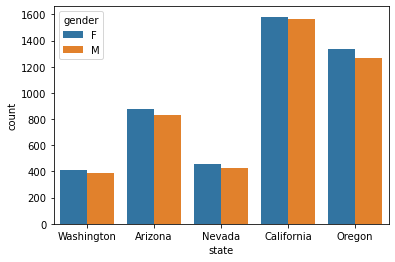

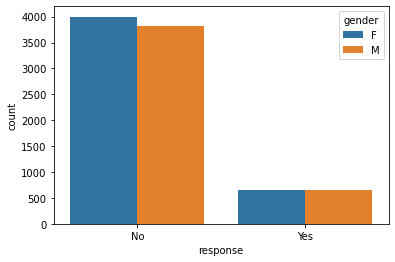

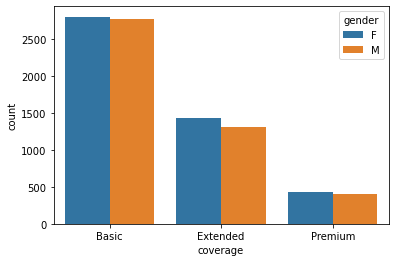

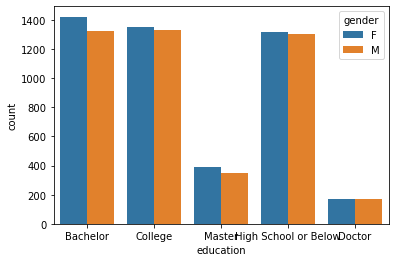

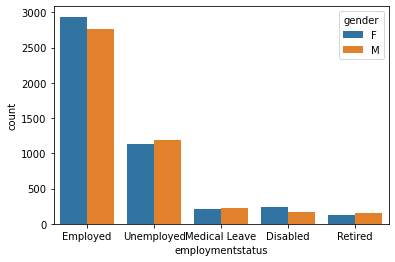

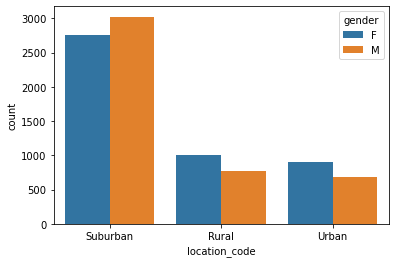

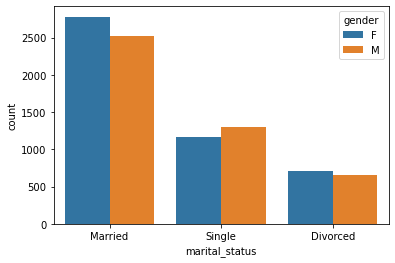

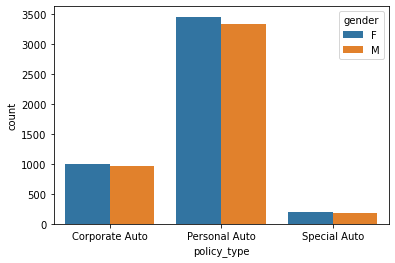

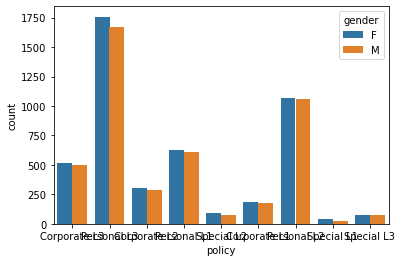

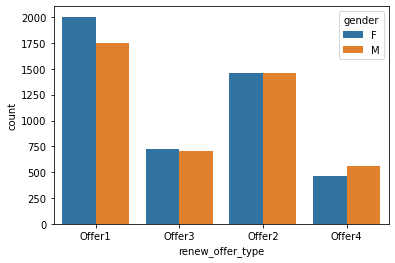

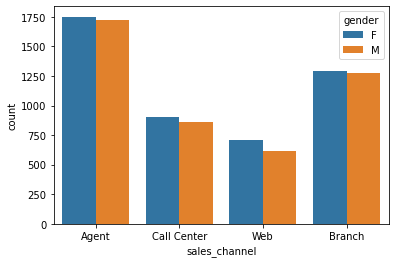

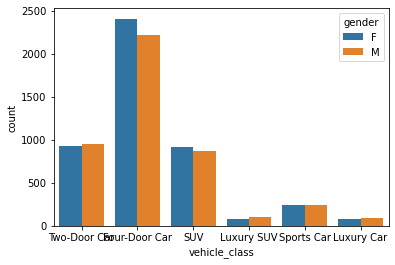

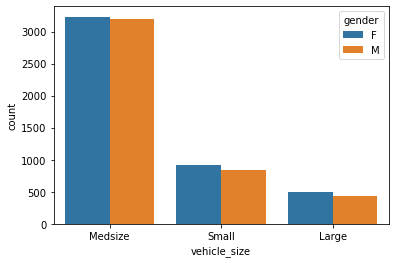

In [22]:
for col in categoricals.drop('customer', axis=1).columns:
    if col in ['effective_to_date', 'gender']:
        continue
    sns.countplot(x=col, data=categoricals, hue='gender')
    plt.show()

We see the distribution of the categorical values. It is also possible to add the variable 'Hue' to the plot. In that Hue, we can add another categorical variable. In the end, we can get more information from the same graph.

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

The columns policy_type and policy are seemingly redundant. I would not remove them, however, since they could both contribute a later model. However, that would be clearly seen with the multicolinearity matrix.

4. Plot time variable. Can you extract something from it?

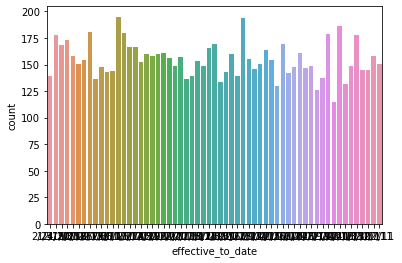

In [23]:
sns.countplot(x='effective_to_date', data=categoricals) #, hue='gender')
plt.show()

No, with this graph there is nothing we can really extract. In fact, I would speculate that it is likely not to have a strong influence on the model.